In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.text import *

In [4]:
class Dictionary(object):
    def __init__(self):
        self.word2idx = {}
        self.idx2word = []
        self.counter = collections.Counter()
        self.total = 0

    def add_word(self, word):
        if word not in self.word2idx:
            self.idx2word.append(word)
            self.word2idx[word] = len(self.idx2word) - 1

        token_id = self.word2idx[word]
        self.counter[token_id] += 1
        self.total += 1
        return token_id

    def __len__(self):
        return len(self.idx2word)


class Corpus(object):
    def __init__(self, path):
        self.dictionary = Dictionary()
        self.train = self.tokenize(os.path.join(path, 'train.txt'))
        self.valid = self.tokenize(os.path.join(path, 'valid.txt'))
        self.test = self.tokenize(os.path.join(path, 'test.txt'))
        self.num_tokens = len(self.dictionary)

    def tokenize(self, path):
        """Tokenizes a text file."""
        assert os.path.exists(path)
        # Add words to the dictionary
        with open(path, 'r') as f:
            tokens = 0
            for line in f:
                words = line.split() + ['<eos>']
                tokens += len(words)
                for word in words:
                    self.dictionary.add_word(word)

        # Tokenize file content
        with open(path, 'r') as f:
            ids = torch.LongTensor(tokens)
            token = 0
            for line in f:
                words = line.split() + ['<eos>']
                for word in words:
                    ids[token] = self.dictionary.word2idx[word]
                    token += 1

        return ids
    
# https://github.com/fastai/fastai_docs/blob/master/dev_nb/007_wikitext_2.ipynb
# download data from https://s3.amazonaws.com/research.metamind.io/wikitext/wikitext-2-v1.zip
EOS = '<eos>'
PATH=Path('')

def read_file(filename):
    tokens = []
    with open(PATH/filename, encoding='utf8') as f:
        for line in f:
            tokens.append(line.split() + [EOS])
    return np.array(tokens)

In [5]:
train_tok = read_file('train.txt')
valid_tok = read_file('valid.txt')
test_tok = read_file('test.txt')

cor = Corpus('')
voc = Vocab(cor.dictionary.idx2word)

In [24]:
len(train_tok[0])

4

In [28]:
a = list(train_tok)

In [30]:
flat_list = [item for sublist in a for item in sublist]



In [32]:
len(flat_list)
# 36000 tokens
# * 30 ~ ptb
# * 80 ~ wikitext-2
# * 4000 ~ wikitext-103

36618

In [8]:
bs = 256
bptt = 35

In [9]:
dat = TextLMDataBunch.from_tokens('data', 
                                  trn_tok = train_tok, trn_lbls = None,
                                  val_tok = valid_tok, val_lbls=None,
                                  tst_tok = test_tok, 
                                  vocab = voc,
                                  bs = bs, bptt = bptt)

In [ ]:
# [] list has some method
# voc.itos is a list so it has those default method

In [20]:
dat

6634

In [17]:
len(voc.itos)

6634

In [10]:
dat.show_batch()

idx,text
0,"world peace through the internal <eos> transformation of individuals is difficult, it is the only way. Wherever I go, I <eos> express this, and I am encouraged that people from many different walks of <eos>"
1,"the small acts of our daily lives, then shows us how to use the <eos> benefits of mindful-ness and concentration to transform and heal difficult <eos> psychological states. Finally he shows us the connection between"
2,"this poem: <eos> <eos> Peace is every step. <eos> <eos> The shining red sun is my heart. <eos> <eos> Each flower smiles with me. <eos> <eos> How green, how fresh all that grows. <eos> <eos>"
3,"Hanh in 1982 when he attended the Reverence for Life <eos> conference in New York. I was one of the first American Buddhists he had <eos> met, and it fascinated him that I looked,"
4,"years later, he <eos> co-founded what was to become the foremost center of Buddhist studies in <eos> South Vietnam, the An Quang Buddhist Institute. <eos> <eos> In 1961, Nhat Hanh came to the United States"


In [72]:
learn = language_model_learner(dat, AWD_LSTM, drop_mult=0.3)

In [62]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


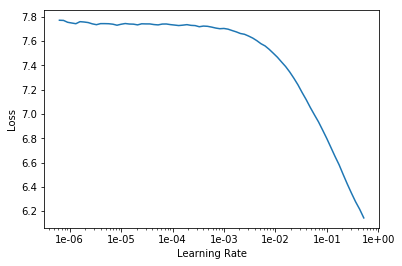

In [63]:
learn.recorder.plot(skip_end=15)

In [73]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,7.434243,6.291749,0.146763,00:02


In [74]:
learn.unfreeze()

In [75]:
learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,6.806639,6.036196,0.155804,00:03
1,6.583589,5.786737,0.167187,00:03
2,6.383882,5.573412,0.173661,00:03
3,6.185344,5.467985,0.168750,00:03
4,5.985403,5.375642,0.186272,00:03
5,5.787715,5.335625,0.188058,00:03
6,5.605351,5.299256,0.190513,00:03
7,5.440596,5.335407,0.185937,00:03
8,5.302589,5.332061,0.189397,00:03
9,5.186543,5.345100,0.188839,00:03


In [78]:
TEXT = "How to breath"
N_WORDS = 40
N_SENTENCES = 2

In [79]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

How to breath Me a child parents work peacefully and your children will not be accept our York. We is very paper. I can sit back and walk every morning to see the baby and look at all your lives and you will
How to breath The mindful of the clinging to the peace, it? <eos> to have a very important Once <eos> many can help us picked up the us. It is very important to there, even if the They is really your happiness is
